# Insurance Claim Analysis: Demographic and Health Factors
## About Dataset
Datset from  kaggle : https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health/data <br>
Dataset contains 11 columns and 1,340 rows, providing detailed information about insurance claims. The attributes include age, gender, BMI, blood pressure, diabetic status, number of children, smoking status, and the region of the insured person.
- Diabetic: Indicates whether the insured person has diabetes.
- Children: Represents the number of children the insured person has.
- Smoker: Indicates whether the insured person is a smoker.
- Claim: The amount of the insurance claim.

The objective is to segment customers for calculating premium using premium principle for each group by selecting an appropriate distribution that aligns with the frequency distribution of insurance purchases in this health insurance dataset.

# Import libraries and Data

In [2]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from scipy.stats import norm, expon, gamma, lognorm 

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('insurance_data.csv')
df.head()

index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01

# Exploratory Data Analysis

Explore and understand in the dataset 
- Exploring Basic information about the dataset. 
- Identifying and handling any missing or null values.
- Checking Duplicate data. 
- Understanding the distribution of numerical and categorical variables.
- Identifying and handling outliers.             

### Exploring Basic information about the dataset

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
df[['age', 'bmi', 'bloodpressure','claim']].describe() 

age          bmi  bloodpressure         claim
count  1335.000000  1340.000000    1340.000000   1340.000000
mean     38.078652    30.668955      94.157463  13252.745642
std      11.102924     6.106735      11.434712  12109.609288
min      18.000000    16.000000      80.000000   1121.870000
25%      29.000000    26.275000      86.000000   4719.685000
50%      38.000000    30.400000      92.000000   9369.615000
75%      47.000000    34.700000      99.000000  16604.305000
max      60.000000    53.100000     140.000000  63770.430000

###  Identifying and handling any missing values.

In [6]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [7]:
# drop null values
df = df.dropna(subset=['age','region'])

In [8]:
df = df.drop(columns=['index'])

### Checking Duplicate data


In [9]:
df.duplicated().sum()

0

### Understanding the distribution
most variables have a **non-normal distribution**, with noticeable **skewness** in their distribution

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

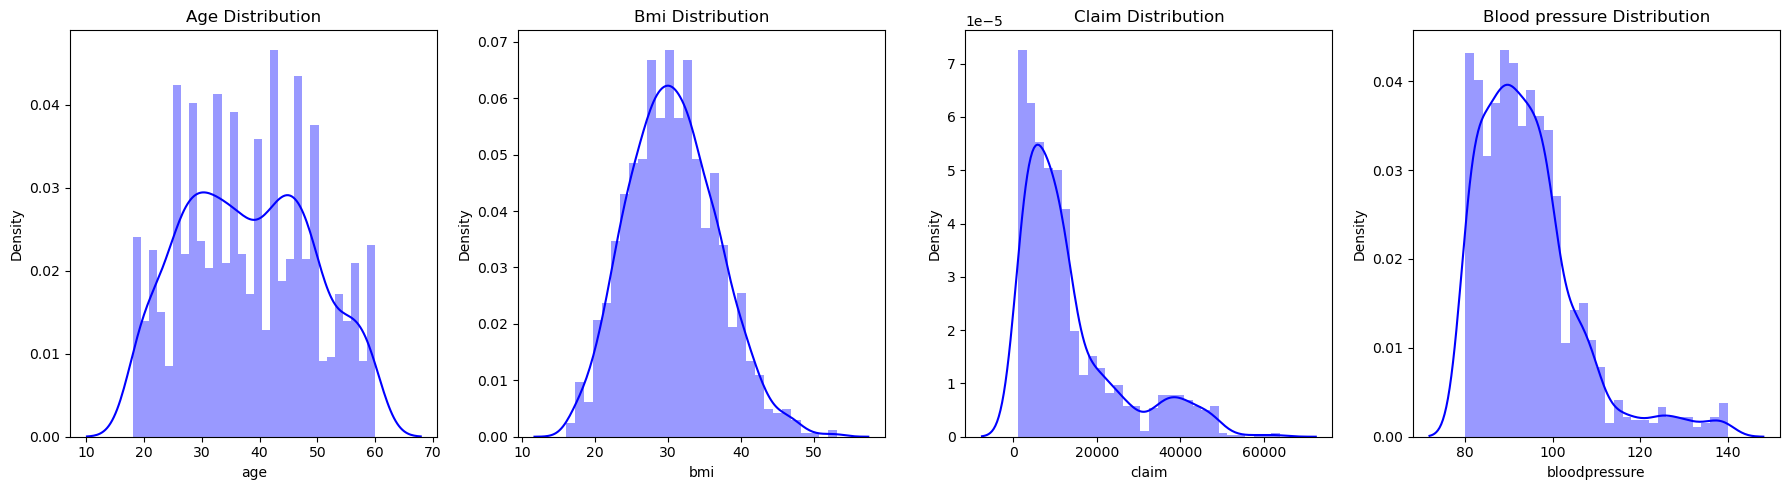

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.distplot(df['age'], ax=axes[0], kde=True, bins=30, color='blue')
axes[0].set_title('Age Distribution')

sns.distplot(df['bmi'], ax=axes[1], kde=True, bins=30, color='blue')
axes[1].set_title('Bmi Distribution')

sns.distplot(df['claim'], ax=axes[2], kde=True, bins=30, color='blue')
axes[2].set_title('Claim Distribution')

sns.distplot(df['bloodpressure'], ax=axes[3], kde=True, bins=30, color='blue')
axes[3].set_title('Blood pressure Distribution')

plt.tight_layout()
plt.show()

### Identifying and handling outliers.
Outliers are found in the dataset, which may affect clustering by distorting group formation.

To remove them, **the Interquartile Range (IQR)** method is used, as it works well for non-normal distributions. IQR helps keep normal values and removes those that are too far from the typical range.



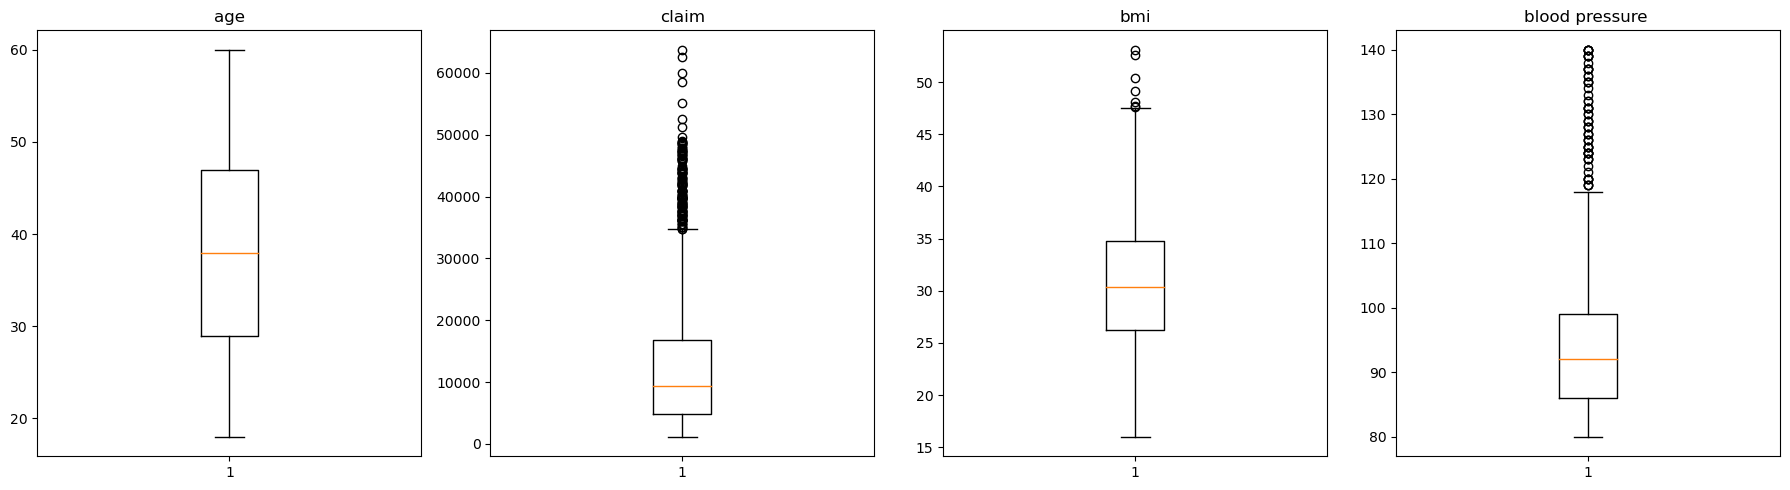

In [11]:
# checking using boxplot
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
axes[0].boxplot(df['age'])
axes[0].set_title('age')

axes[1].boxplot(df['claim'])
axes[1].set_title('claim')

axes[2].boxplot(df['bmi'])
axes[2].set_title('bmi')

axes[3].boxplot(df['bloodpressure'])
axes[3].set_title('blood pressure ')


plt.tight_layout()
plt.show()

In [12]:
# handling outliers
def remove_outliers_iqr(df, columns=['age', 'bmi', 'bloodpressure', 'claim']):
    if columns is None:
        columns = df.columns

    df_filtered = df.copy()

    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)  
        Q3 = df_filtered[col].quantile(0.75)  
        IQR = Q3 - Q1  

        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR  

        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered

df = remove_outliers_iqr(df, columns=['age', 'bmi', 'bloodpressure', 'claim'])  

# Feature Engineering 
For feature engineering in this dataset, there are 2 main steps:

- Encoding: This is used to convert categorical data into numerical data so that the model can process it.
- Standardization: This step scales numerical data to have a mean of 0 and a standard deviation of 1, helping to reduce the differences in scale between features. It is particularly useful for models sensitive to data scale.

### Encoding 

In [13]:
# split data to categorical and numerical
cat_df = df[['gender', 'diabetic', 'children', 'smoker', 'region']]
num_df = df[['age', 'bmi', 'bloodpressure', 'claim']]

In [14]:
le = LabelEncoder()

# categorical columns 
cat_df = df.select_dtypes(exclude=["int", "float"]) 

# label encoding
for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

num_df = df.select_dtypes(include=['int', 'float'])
df_encode = pd.concat([num_df, cat_df], axis=1)

<AxesSubplot:>

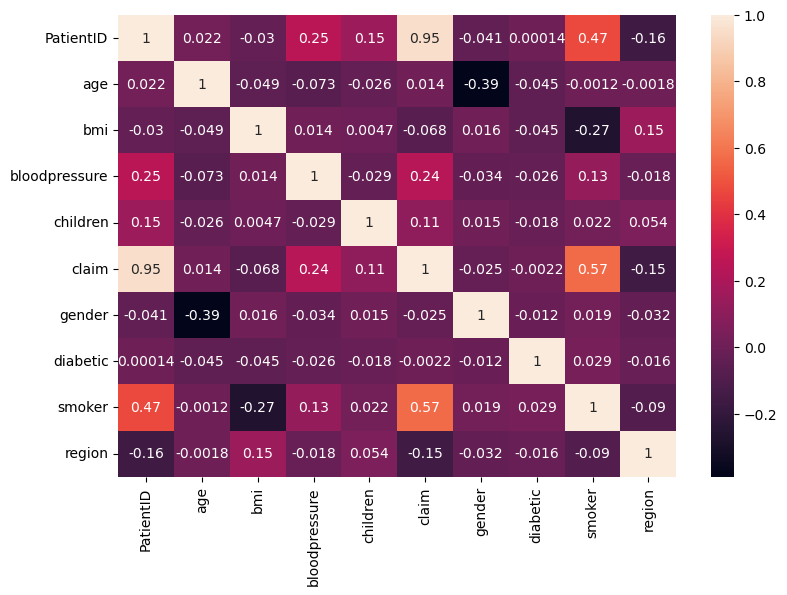

In [15]:
corr = df_encode.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot =True)

the numerical variables affecting the claim amount (claim) are **BMI and blood pressure**.

Therefore, when selecting variables for clustering, BMI and blood pressure will be chosen because they are related to the claim amount.

### Standardization

In [16]:
scaler = StandardScaler()  
scaled_data = scaler.fit_transform(df[['age', 'bmi', 'bloodpressure', 'claim']])

In [17]:
scaled_df = pd.DataFrame(scaled_data, columns=['age', 'bmi', 'bloodpressure', 'claim'])
scaled_df

age       bmi  bloodpressure     claim
0     0.066318 -1.144552      -0.089507 -1.311666
1    -1.281972  0.014767      -0.604563 -1.310114
2    -1.731402  1.862957       1.069370 -1.307651
3    -1.641516  2.182190      -0.733327 -1.307232
4    -0.203340 -1.715810      -0.475799 -1.292387
...        ...       ...            ...       ...
1143 -0.113454  0.888457      -1.377147  2.972968
1144 -1.461744  1.022871      -1.505911  3.007918
1145 -0.472998  1.090078       3.387123  3.063744
1146 -0.203340 -0.405276       3.387123  3.072166
1147 -1.012314  1.913362       0.425549  3.094157

[1148 rows x 4 columns]

# Data Modeling (Clustering)
To create a customer segmentation model, the **K-Means Clustering Algorithm** is chosen because it is efficient for clustering numerical data, using distance as a measure of similarity between data points.

To determine the optimal value of k (the number of clusters), **the Silhouette Score method** is used to evaluate and select the best number of clusters. For the clustering variables, claim (insurance claim amount), blood pressure, and BMI are selected because they are related to the claim amount.


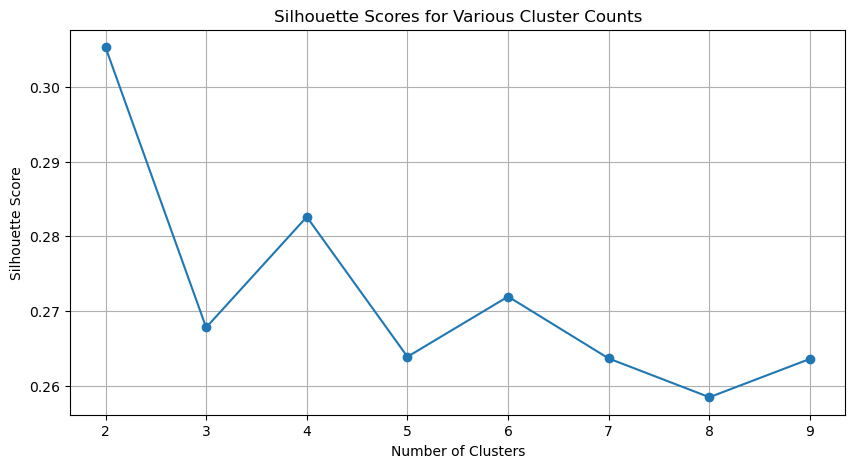

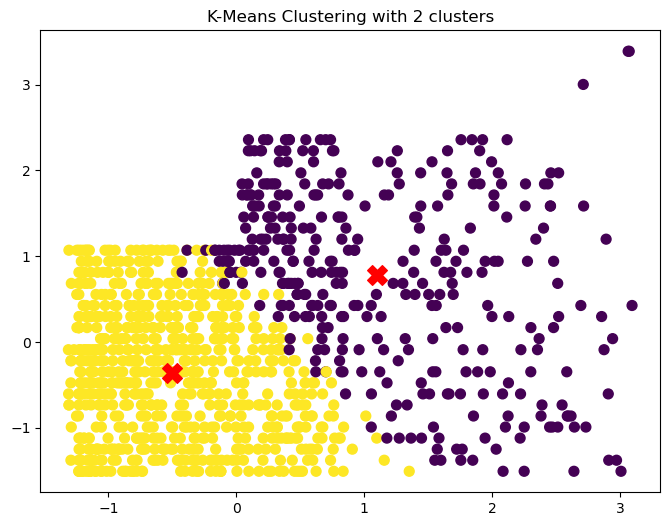

In [18]:
df2 = scaled_df[['claim', 'bloodpressure', 'bmi']]
range_cluster = list(range(2, 10))
silhouette_scores = []

# Silhouette Score 
for n_clusters in range_cluster:
    km = KMeans(n_clusters=n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    cluster_labels = km.fit_predict(df2
) 
    silhouette_avg = silhouette_score(df2
, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# find best K
best_n_cluster = range_cluster[np.argmax(silhouette_scores)]

km = KMeans(n_clusters=best_n_cluster, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
cluster_labels = km.fit_predict(df2)

plt.figure(figsize=(10, 5))
plt.plot(range_cluster, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50)  
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title(f'K-Means Clustering with {best_n_cluster} clusters')
plt.show()


df2['label'] = cluster_labels


fig = px.scatter_3d(df2, x='claim', y='bloodpressure', z='bmi', color='label', title=f'K-Means Clustering with {best_n_cluster} clusters')
fig.show()


In [19]:
df['clusters'] = km.labels_
df

PatientID   age  gender   bmi  bloodpressure diabetic  children smoker  \
0             1  39.0    male  23.2             91      Yes         0     No   
1             2  24.0    male  30.1             87       No         0     No   
7             8  19.0    male  41.1            100       No         0     No   
8             9  20.0    male  43.0             86       No         0     No   
10           11  36.0    male  19.8             88      Yes         0     No   
...         ...   ...     ...   ...            ...      ...       ...    ...   
1163       1164  37.0    male  35.3             81       No         1     No   
1165       1166  22.0    male  36.1             80       No         3     No   
1167       1168  33.0  female  36.5            118       No         1     No   
1168       1169  36.0  female  27.6            118       No         1     No   
1170       1171  27.0  female  41.4             95       No         1     No   

         region     claim  clusters  
0     southeast   1121.87         1  
1     southeast   1131.51         1  
7     northwest   1146.80         1  
8     northwest   1149.40         1  
10    northwest   1241.57         1  
...         ...       ...       ...  
1163  southeast  27724.29         0  
1165  southwest  27941.29         0  
1167  southeast  28287.90         0  
1168  northwest  28340.19         0  
1170  northwest  28476.73         0  

[1148 rows x 11 columns]

In [20]:
df[df["clusters"] == 0].describe().T

count          mean          std      min         25%  \
PatientID      360.0    940.927778   157.209618   480.00    820.5000   
age            360.0     38.222222    10.796706    18.00     30.0000   
bmi            360.0     29.040556     5.705216    16.80     24.9750   
bloodpressure  360.0     97.794444     8.032106    80.00     92.0000   
children       360.0      1.122222     1.231687     0.00      0.0000   
claim          360.0  16111.110750  5325.595966  6640.54  11637.6225   
clusters       360.0      0.000000     0.000000     0.00      0.0000   

                     50%        75%       max  
PatientID        976.000   1071.250   1171.00  
age               38.000     45.250     60.00  
bmi               28.200     32.400     46.80  
bloodpressure     99.000    104.000    118.00  
children           1.000      2.000      5.00  
claim          14523.285  20191.965  28476.73  
clusters           0.000      0.000      0.00

In [21]:
df[df["clusters"] == 1].describe().T

count         mean          std      min       25%       50%  \
PatientID      788.0   423.213198   257.463860     1.00   207.750   404.500   
age            788.0    38.280457    11.285766    18.00    29.000    38.000   
bmi            788.0    30.455964     6.016278    16.00    26.000    30.100   
bloodpressure  788.0    88.908629     5.810150    80.00    84.000    89.000   
children       788.0     1.086294     1.216224     0.00     0.000     1.000   
claim          788.0  6138.412957  3473.702427  1121.87  3196.065  5486.365   
clusters       788.0     1.000000     0.000000     1.00     1.000     1.000   

                     75%       max  
PatientID       608.2500   1022.00  
age              48.0000     60.00  
bmi              34.4000     47.50  
bloodpressure    93.0000    100.00  
children          2.0000      5.00  
claim          8516.0275  17663.14  
clusters          1.0000      1.00

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



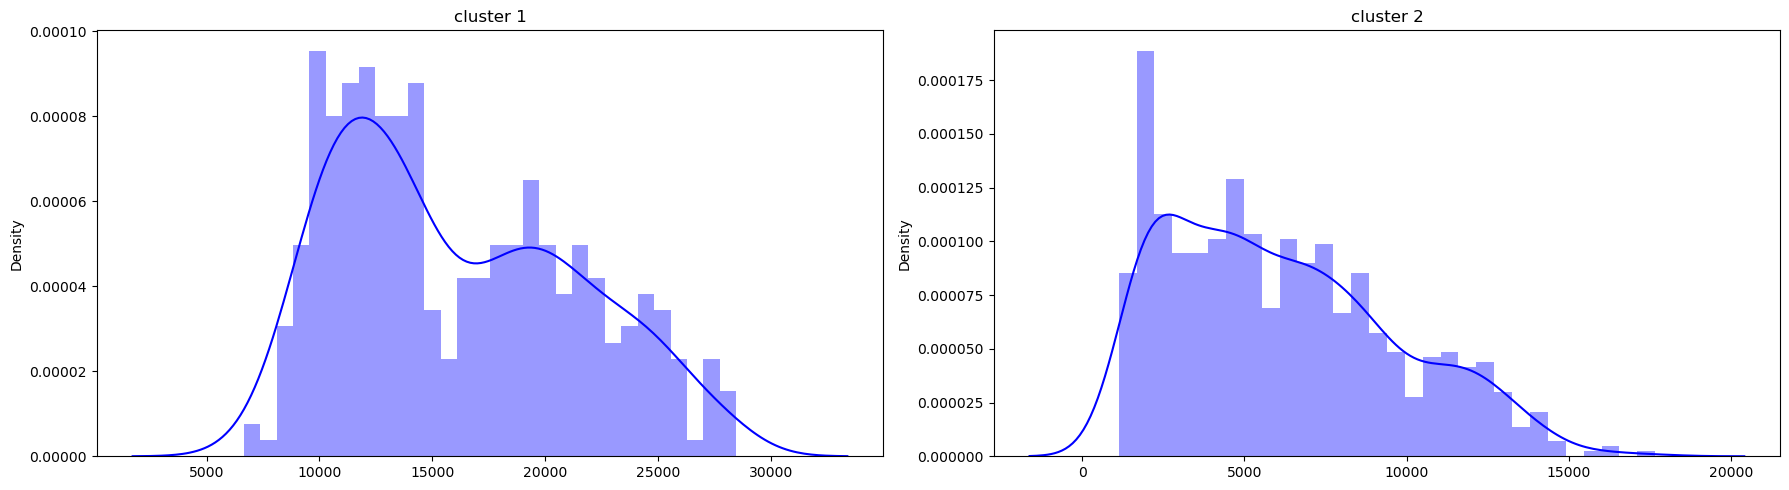

In [22]:
# checking distribution
cluster1 = df[df["clusters"] == 0][['claim']]
cluster2 = df[df["clusters"] == 1][['claim']]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.distplot(cluster1, ax=axes[0], kde=True, bins=30, color='blue')
axes[0].set_title('cluster 1')

sns.distplot(cluster2, ax=axes[1], kde=True, bins=30, color='blue')
axes[1].set_title('cluster 2')

plt.tight_layout()
plt.show()

Summary after checking distribution and basic information in each cluster
- Cluster 1 has a distribution similar to a right-skewed distribution, with a higher number of claims in some cases, but most values are concentrated in the lower range. The average claim amount in this cluster is 16111.11, which is higher than in Cluster 2.

- Cluster 2 also shows a distribution similar to Cluster 1 but with a wider spread of data. There are higher claim amounts in the lower price range. The average claim amount in this cluster is 6138.41.

# Model inference and selection

To find the most appropriate distribution for each cluster obtained from K-Means Clustering, we will compare the **AIC (Akaike Information Criterion)** values of each distribution we want to test: Normal Distribution, Exponential Distribution, Gamma Distribution, and Log-Normal Distribution. This will help identify which model best explains the data.

AIC will assist in selecting the best model from a set of candidate models by evaluating their goodness of fit while accounting for model complexity. The model with the lowest AIC value is generally considered the best.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



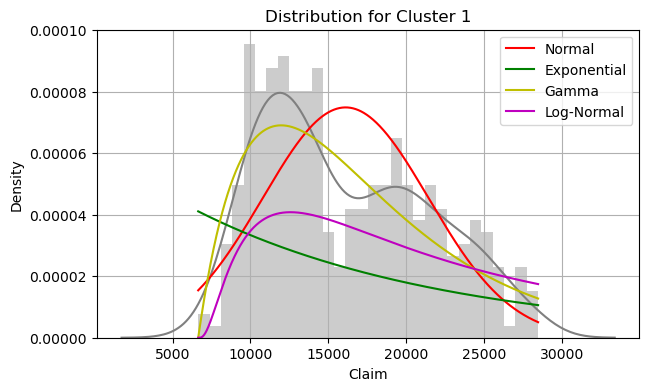

Normal AIC: 7202.435882520288
Exponential AIC: 7314.280006617479
Gamma AIC: 7159.935828144903
Log-Normal AIC: 9109.471786297083
The best distribution for cluster 1 based on AIC is: Gamma


In [23]:
# cluster 1
x = np.linspace(cluster1.min(), cluster1.max(), 1000)
pdf_norm = norm.pdf(x, loc=cluster1.mean(), scale=cluster1.std())
pdf_expon = expon.pdf(x, scale=cluster1.mean())
pdf_gamma = gamma.pdf(x, a=2, loc=cluster1.min(), scale=(cluster1.std()))
pdf_lognorm = lognorm.pdf(x, s=1, loc=cluster1.min(), scale=(cluster1.mean()))

plt.figure(figsize=(7, 4))
sns.distplot(cluster1, kde=True, bins=30, color='gray')
plt.plot(x, pdf_norm, 'r-', label='Normal')
plt.plot(x, pdf_expon, 'g-', label='Exponential')
plt.plot(x, pdf_gamma, 'y-', label='Gamma')
plt.plot(x, pdf_lognorm, 'm-', label='Log-Normal')

plt.title('Distribution for Cluster 1')
plt.xlabel('Claim')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# normal distribution
mu, sigma = norm.fit(cluster1)  
log_likelihood_norm = np.sum(norm.logpdf(cluster1, mu, sigma))
k_norm = 2  # Parameters: mean and std
aic_norm = 2 * k_norm - 2 * log_likelihood_norm

# exponential distribution
loc, scale = expon.fit(cluster1)  
log_likelihood_expon = np.sum(expon.logpdf(cluster1, loc, scale))
k_expon = 1  # Parameters: scale
aic_expon = 2 * k_expon - 2 * log_likelihood_expon

# gamma distribution
a, loc_gamma, scale_gamma = gamma.fit(cluster1) 
log_likelihood_gamma = np.sum(gamma.logpdf(cluster1, a, loc_gamma, scale_gamma))
k_gamma = 3  # Parameters: shape (a), loc, scale
aic_gamma = 2 * k_gamma - 2 * log_likelihood_gamma

# log-normal distribution
shape, loc_l, scale_l = lognorm.fit(cluster1)  
log_likelihood_lognorm = np.sum(lognorm.logpdf(cluster1, shape, loc_l, scale_l))
k_lognorm = 3  # Parameters: shape (s), loc, scale
aic_lognorm = 2 * k_lognorm - 2 * log_likelihood_lognorm

# compare AIC score
aic_scores = {
    "Normal": aic_norm,
    "Exponential": aic_expon,
    "Gamma": aic_gamma,
    "Log-Normal": aic_lognorm
}

for dist, aic in aic_scores.items():
    print(f"{dist} AIC: {aic}")


best_fit = min(aic_scores, key=aic_scores.get)
print(f"The best distribution for cluster 1 based on AIC is: {best_fit}")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



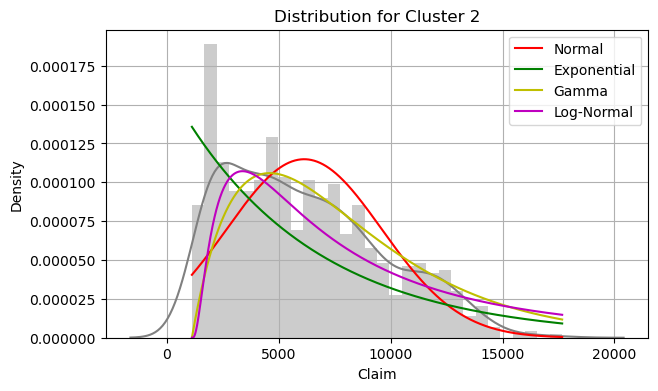

Normal AIC: 15088.337120042848
Exponential AIC: 15006.302202591476
Gamma AIC: 14926.613859440404
Log-Normal AIC: 18317.117598354278
The best distribution for cluster 2 based on AIC is: Gamma


In [24]:
# cluster 2
y = np.linspace(cluster2.min(), cluster2.max(), 1000)
pdf_norm = norm.pdf(y, loc=cluster2.mean(), scale=cluster2.std())
pdf_expon = expon.pdf(y, scale=cluster2.mean())
pdf_gamma = gamma.pdf(y, a=2, loc=cluster2.min(), scale=(cluster2.std()))
pdf_lognorm = lognorm.pdf(y, s=1, loc=cluster2.min(), scale=(cluster2.mean()))


plt.figure(figsize=(7, 4))
sns.distplot(cluster2, kde=True, bins=30, color='gray')

plt.plot(y, pdf_norm, 'r-', label='Normal')
plt.plot(y, pdf_expon, 'g-', label='Exponential')
plt.plot(y, pdf_gamma, 'y-', label='Gamma')
plt.plot(y, pdf_lognorm, 'm-', label='Log-Normal')

plt.title('Distribution for Cluster 2')
plt.xlabel('Claim')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# normal distribution
mu, sigma = norm.fit(cluster2)  
log_likelihood_norm = np.sum(norm.logpdf(cluster2, mu, sigma))
k_norm = 2  # Parameters: mean and std
aic_norm = 2 * k_norm - 2 * log_likelihood_norm

# exponential distribution
loc, scale = expon.fit(cluster2)  
log_likelihood_expon = np.sum(expon.logpdf(cluster2, loc, scale))
k_expon = 1  # Parameters: scale
aic_expon = 2 * k_expon - 2 * log_likelihood_expon

# gamma distribution
a, loc_gamma, scale_gamma = gamma.fit(cluster2) 
log_likelihood_gamma = np.sum(gamma.logpdf(cluster2, a, loc_gamma, scale_gamma))
k_gamma = 3  # Parameters: shape (a), loc, scale
aic_gamma = 2 * k_gamma - 2 * log_likelihood_gamma

# log-normal distribution
shape, loc_l, scale_l = lognorm.fit(cluster2)  
log_likelihood_lognorm = np.sum(lognorm.logpdf(cluster2, shape, loc_l, scale_l))
k_lognorm = 3  # Parameters: shape (s), loc, scale
aic_lognorm = 2 * k_lognorm - 2 * log_likelihood_lognorm


aic_scores = {
    "Normal": aic_norm,
    "Exponential": aic_expon,
    "Gamma": aic_gamma,
    "Log-Normal": aic_lognorm
}


for dist, aic in aic_scores.items():
    print(f"{dist} AIC: {aic}")


best_fit = min(aic_scores, key=aic_scores.get)
print(f"The best distribution for cluster 2 based on AIC is: {best_fit}")

From the comparison of AIC values across different distributions, it was found that the **Gamma Distribution** has the best fit for the insurance claim frequency of both customer groups. Therefore, the Gamma Distribution will be chosen for calculating the insurance premium in the next steps.

Cluster 1: shape=3.3274872298467226, loc=5952.065169144234, scale=3053.068279291827
Cluster 2: shape=1.6837529747160744, loc=1035.9125811293184, scale=3030.4328953096256


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



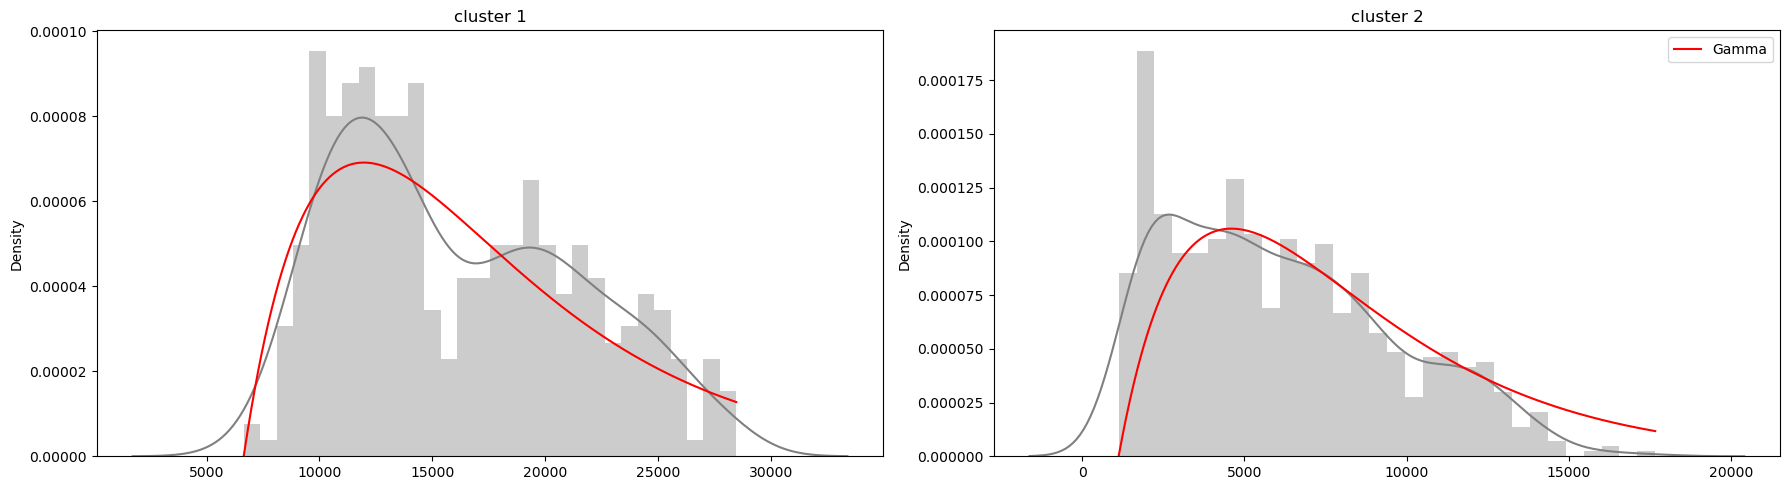

In [25]:
cluster1 = df[df["clusters"] == 0][['claim']] 
cluster2 = df[df["clusters"] == 1][['claim']] 

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

#cluster 1
shape1, loc1, scale1 = gamma.fit(cluster1['claim'].values) 
print(f"Cluster 1: shape={shape1}, loc={loc1}, scale={scale1}")

x = np.linspace(cluster1.min(), cluster1.max(), 1000)
pdf_gamma = gamma.pdf(x, a=2, loc=cluster1.min(), scale=(cluster1.std()))
sns.distplot(cluster1, ax=axes[0], kde=True, bins=30, color='gray')
axes[0].plot(x, pdf_gamma, 'r-', label='Gamma' )
axes[0].set_title('cluster 1')

#cluster 2
shape2, loc2, scale2 = gamma.fit(cluster2['claim'].values) 
print(f"Cluster 2: shape={shape2}, loc={loc2}, scale={scale2}")

y = np.linspace(cluster2.min(), cluster2.max(), 1000)
pdf_gamma = gamma.pdf(y, a=2, loc=cluster2.min(), scale=(cluster2.std()))
sns.distplot(cluster2, ax=axes[1], kde=True, bins=30, color='gray')
axes[1].plot(y, pdf_gamma, 'r-', label='Gamma' )
axes[1].set_title('cluster 2')

plt.legend()
plt.tight_layout()
plt.show()

# Premium Principle & Credibility Theory

## Premium Principle 
Consider health insurance policy that segments customers into two groups, each with 1,000 policyholders.
Assume the probability of no one filing a claim is 0.8, and the probability of having a claimant is 0.2. The loss values for each group follow a Gamma distribution with parameters.
- For Group 1: α1 = 3.3, β1 = 3053
- For Group 2: α2 = 1.6, β2 = 3030 <br>
Additionally, assume a risk loading of 30,000 THB.

#### 1. calculate Expected Loss
$$
  E[X] =  \frac{\alpha}{\beta} 
$$
- for cluster 1:
  $$
  E[X_1] = 0.2 \cdot \frac{\alpha_1}{\beta_1} = 0.2 \cdot \frac{3.3}{3053} = 0.0002161
  $$
- for cluster 2:
  $$
  E[X_2] =  0.2 \cdot \frac{\alpha_2}{\beta_2} =  0.2 \cdot \frac{1.6}{3030} = 0.0001056
  $$

#### 2.calculate Total Expected Loss
  $$
  E[Xtotal] = 1000 \cdot (E[X_1] + E[X_2])
  $$

  $$
  E[Xtotal] = 1000 \cdot ( 0.0002161 + 0.0001056) = 0.3217
  $$
  
#### 3. calculate Excuss Percentage 
  $$
  Pexp[Xtotal] = E[Xtotal] + \text{Risk Loading} = 0.3217 + 0.003 = 0.3247
  $$

- calculate 𝜇 :
  $$
  0.3247 = (1 + \mu) \cdot 0.3217 
  $$
  $$
  \mu = 0.0093254
  $$
  
#### 4. calculate Premium for each group
$$
  Pexp[Xtotal] =  (1 + \mu) \cdot E[X_i]
$$

- for cluster 1:
$$
  Pexp[X_1] =  (1 + 0.0093254) \cdot 0.0002161 = 0.0002181 \text{Million Baht per Policy Holder}
$$
- for cluster 2:
$$
  Pexp[X_2] =  (1 + 0.0093254) \cdot 0.0001056 = 0.0001065 \text{Million baht per Policy Holder}
$$




## Credibility theory

#### 1. calculate E(S) for each group
$$
  E(S) =  E(N) \cdot E(X)
$$
- cluster 1:
  $$
  E(X_1) = \frac{\alpha_1}{\beta_1} = \frac{3.3}{3053} = 0.00108
  $$
 Assume that N has Poisson distribution for cluster 1 rate parameter (λ) is 0.2.
  $$
  E(S_1) = 0.2 \cdot 0.00108 = 0.000214
  $$
  
- สำหรับกลุ่ม 2:
  $$
  E(X_2) = \frac{\alpha_2}{\beta_2} = \frac{1.6}{3030} = 0.000528
  $$
 Assume that N has Poisson distribution for cluster 1 rate parameter (λ) is 0.5.
  $$
  E(S_2) = 0.5 \cdot 0.000528= 0.000264
  $$
  
- calculate Weight average of expected aggregate losses by assume Percentage of loss Occurence are **50% and 30%, respectively**.   


$$
\hat{\mu} = 0.3(0.000214) + 0.5(0.000264) = 0.0000642 + 0.000132 = 0.0001962
$$

#### 2. calculate Var(S)
$$
Var(S) = E(N)Var(X) + [E(X)]^{2}Var(N)
$$

- cluster 1:
$$
Var(S_1) = 0.2 \cdot (3.54 \times 10^{-7}) + (0.000528)^2 \cdot 0.2 = 0.000000304
$$

- cluster 2:
$$
Var(S_2) = 0.5 \cdot (1.74 \times 10^{-7}) + (0.00108)^2 \cdot 0.2 = 0.000000320
$$

#### 3. calcucate EPV
$$
EPV = 0.5(0.000000304) + 0.3(0.000000320) = 2.48 \times 10^{-7}
$$

#### 4. calculate VHM
$$
VHM = 0.5(E(S_1) - \hat{\mu})^{2} + 0.3(E(S_2) - \hat{\mu})^{2} 
$$
$$
VHM = 0.5(0.000214 - 0.0001962)^{2} + 0.3(0.000528 - 0.0001962)^{2} = 3.3186 \times 10^{-8}
$$

#### 5. calculate credibility factor Z
$$
Z = \frac{EPV}{EPV + VHM}
$$

$$
Z = \frac{2.48 \times 10^{-7}}{2.48 \times 10^{-7} + 3.3186 \times 10^{-8}} = 0.88197
$$

#### 6. calculate Annual Expected Aggregate loss <br>
Assume the total value of losses over 3 years is 300,000 THB.
$$
\hat{S} = Z \times (\frac{\text{Total losses Over 3 year}}{3}) + (1-Z) \times \hat{\mu}
$$
$$
\hat{S} = 0.88197 \times (\frac{300,000}{3}) + (1-0.88197) \times 0.0001962 
$$
$$
\hat{S} = 88,197
$$
Therefore, the Annual Expected Aggregate Loss is **88,197 THB**